# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import bernoulli, binom, norm

%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

# data.info(), data.describe(), data.head(), etc.

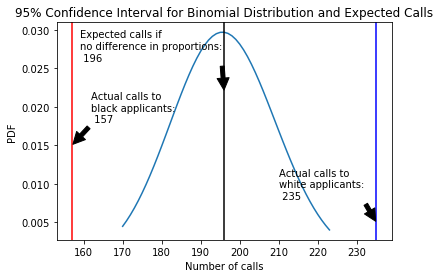

In [3]:
mini = data[['race', 'call']]
n = len(mini)
# Proportion of callbacks over the entire data set
p = np.sum(mini.call) / n

# Proportion of callbacks to black and white applicants
black_calls = np.sum(mini.loc[mini.race == 'b'].call)
white_calls = np.sum(mini.loc[mini.race == 'w'].call)

# Calculate 95% confidence interval for Binomial distribution 
# Note that we're using n/2 here, because half of the applicants were "black" and half were "white"
x_vals = np.linspace(binom.ppf(0.025, n/2, p), binom.ppf(0.975, n/2, p), 54)
y_vals = binom.pmf(x_vals, n/2, p)

# chart and label
_ = plt.plot(x_vals, y_vals)
_ = plt.xlabel('Number of calls')
_ = plt.ylabel('PDF')
_ = plt.title('95% Confidence Interval for Binomial Distribution and Expected Calls')

# Annotate
_ = plt.axvline(white_calls, color='blue')
_ = plt.annotate('Actual calls to\nwhite applicants:\n'+ '{:4.0f}'.format(white_calls), xy=(white_calls, 0.005), xytext=(white_calls - 25, 0.008), arrowprops=dict(facecolor='black', shrink=0.05))
_ = plt.axvline(p * n/2, color='black')
_ = plt.annotate('Expected calls if\nno difference in proportions:\n' + '{:4.0f}'.format(p*n/2), xy=(p * n/2, 0.022), xytext=(p * n/2 - 37, 0.026), arrowprops=dict(facecolor='black', shrink=0.05))
_ = plt.axvline(black_calls, color='red')
_ = plt.annotate('Actual calls to\nblack applicants:\n' + '{:4.0f}'.format(black_calls), xy=(black_calls, 0.015), xytext=(black_calls + 5, 0.018), arrowprops=dict(facecolor='black', shrink=0.05))

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

# #1:  What test is appropriate for this problem? Does CLT apply?

A two-tailed z-test for difference in proportions.
* Two-tailed because the difference could be positive or negative (regardless of what we *expect* the difference may be)
* z-test because the Central Limit Theorem applies (see below)
* Difference of proportions because we're considering proportion of callbacks, not a mean

The Central Limit Theorem applies:
* The names were randomized to the applications, and applications within each group were sent to the employers
* The events are independent - in particular, since employers will call more than one applicant for a job, we can expect that an employer could call both a "white-sounding" and a "black-sounding" applicant, so the events are independent
* Sample sizes are large - 2,435 of each "black" and "white"
* Furthermore, repeated trials of the Bernoulli distribution provide the Binomial distribution, which is well approximated by the Normal distribution.

# #2:  What are the null and alternate hypotheses?

H0: There is NO difference between the proportions of callbacks between black and white applicants.

H1: There is a difference between the proportions of callbacks between black and white applicants.

In [4]:
# Your solution to Q3 here

# #3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

Observed difference in proportions: -0.032
Rejection region : < -1.96 or > 1.96
z-value for observed difference in proportions: -4.11
Reject the null hypothesis


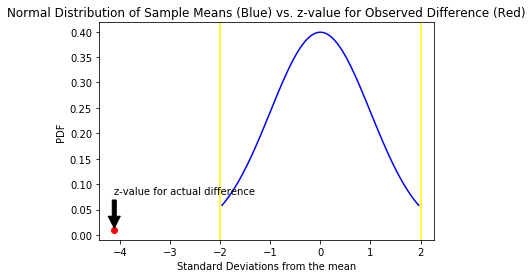

In [5]:
# Frequentist approach
# Two-tailed z-test for difference in proportions
# H0: There is NO difference between the proportions of callbacks between black and white applicants.
# H1: There is a difference between the proportions of callbacks between black and white applicants.
# Alpha = 0.5, i.e. 95% confidence level

# Initialize variables
mini = data[['race', 'call']]
n = len(mini)

# Proportion of callbacks over the entire data set, black applicants, and white applicants
p = np.sum(mini.call) / n
black_calls = np.sum(mini.loc[mini.race == 'b'].call)
white_calls = np.sum(mini.loc[mini.race == 'w'].call)

# Sample mean, standard deviation, and standard error from Binomial distributions
x_bar = p * n/2
s = (p * (1-p) * n/2) ** 0.5
se = (p * (1-p) * (1/(n/2) + 1/(n/2))) ** 0.5

# test statistic: p_diff = p_black - p_white
p_diff_test = (black_calls - white_calls) / (n/2)
# Again, H0: p_diff = 0
p_diff_null = 0

# Two-tailed, 95% confidence
crit_val = norm.ppf(0.975) # ~ 1.96

z_val = (p_diff_test - p_diff_null) / se

# report results verbally
print('Observed difference in proportions: ' + '{:3.3f}'.format(p_diff_test))
print('Rejection region : < ' + '{:4.2f}'.format(-crit_val) + ' or > ' + '{:4.2f}'.format(crit_val))
print('z-value for observed difference in proportions: ' + '{:4.2f}'.format(z_val))
if z_val < -crit_val or z_val > crit_val:
    print('Reject the null hypothesis')
else:
    print('Fail to reject (i.e., accept) the null hypothesis')

# chart of normal distribution
x = np.linspace(norm.ppf(0.025), norm.ppf(0.975), 100)
_ = plt.plot(x, norm.pdf(x), 'b-')

# add our z_val, confidence interval, and labels
_ = plt.plot(z_val, 0.01, 'ro')
_ = plt.annotate('z-value for actual difference', xy=(z_val, .01), xytext=(z_val, 0.08), arrowprops=dict(facecolor='black', shrink=0.05))
_ = plt.axvline(-2, color='yellow')
_ = plt.axvline(2, color='yellow')
_ = plt.title('Normal Distribution of Sample Means (Blue) vs. z-value for Observed Difference (Red)')
_ = plt.xlabel('Standard Deviations from the mean')
_ = plt.ylabel('PDF')

Confidence interval: -37.00, 37.00


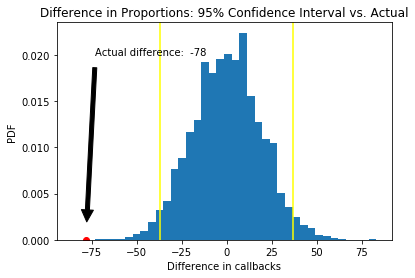

In [6]:
# Bootstrap approach
# Two-tailed z-test for difference in proportions
# H0: There is NO difference between the proportions of callbacks between black and white applicants.
# H1: There is a difference between the proportions of callbacks between black and white applicants.
# Alpha = 0.5, i.e. 95% confidence level

# Initialize variables
mini = data[['race', 'call']]
n = len(mini)

# Proportion of callbacks over the entire data set, and actual difference in calls between black and white applicants
p = np.sum(mini.call) / n
black_calls = np.sum(mini.loc[mini.race == 'b'].call)
white_calls = np.sum(mini.loc[mini.race == 'w'].call)
actual_diff = np.sum(black_calls) - np.sum(white_calls)

# Get 10,000 samples of proportions of callbacks for 'white' and 'black' names
n_bs = 10000
black_ps = np.empty(n_bs)
white_ps = np.empty(n_bs)
    
for i in range(n_bs):
    bs_sample = np.random.choice(mini.call, n)
    black_calls_bs = bs_sample[:(n//2)]
    white_calls_bs = bs_sample[(n//2):]
    black_p_bs = sum(black_calls_bs)
    white_p_bs = sum(white_calls_bs)
    black_ps[i] = black_p_bs
    white_ps[i] = white_p_bs

# list of differences between bootstrap 'black' and 'white' calls
diffs = black_ps - white_ps

# plot from sample
_ = plt.hist(diffs, bins=40, density=1)
_ = plt.xlabel('Difference in callbacks')
_ = plt.ylabel('PDF')
_ = plt.title('Difference in Proportions: 95% Confidence Interval vs. Actual')

# create and chart conf interval and actual
conf = np.percentile(diffs, [2.5, 97.5])
_ = plt.axvline(conf[0], color='yellow')
_ = plt.axvline(conf[1], color='yellow')
_ = plt.plot(actual_diff, 0.0, 'ro')
_ = plt.annotate('Actual difference: ' + '{:4.0f}'.format(actual_diff), xy=(actual_diff, 0.001), xytext=(actual_diff + 5, 0.02), arrowprops=dict(facecolor='black', shrink=0.05))

print('Confidence interval: ' + '{:4.2f}'.format(conf[0]) + ', ' + '{:4.2f}'.format(conf[1]))

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

# #4: Write a story describing the statistical significance in the context or the original problem.

With 95% confidence, there *is* a difference in the mean callback rates for applicants with 'black-sounding' names versus applicants with 'white-sounding' names. In particular, the mean callback rate for 'black-sounding' applicants is much lower than you would ascribe to random chance.

# #5: Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

No, the analysis says nothing about which is the most important factor in callback success.

The analysis is simply whether the data provide sufficient evidence that in a randomized test, all other factors considered equal, 'white-sounding' applicants and 'black-sounding' applicants recieve different proportions of callbacks from employers.

To check whether other factors are more important, I would run a regression of the factors against callback rates to identify likely candidate factors, and then do a hypothesis test on the difference of proportions between race and the other factor.  